In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.simplefilter('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

pd.set_option('display.float_format', lambda x: '%.2f' % x)

sns.set_style('whitegrid')

%matplotlib inline

In [3]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
 
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
link = 'https://drive.google.com/file/d/17YAsfzIT2sOXIR-Ptb61xPQjFBMkUhx3/view?usp=share_link'
 
id = link.split("/")[-2]
 
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('heart_disease_data.csv') 

df = pd.read_csv('heart_disease_data.csv')

In [5]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
278,58,0,1,136,319,1,0,152,0,0.00,2,2,2,0
281,52,1,0,128,204,1,1,156,1,1.00,1,0,0,0
193,60,1,0,145,282,0,0,142,1,2.80,1,2,3,0
153,66,0,2,146,278,0,0,152,0,0.00,1,1,2,1
148,44,1,2,120,226,0,1,169,0,0.00,2,0,2,1


In [7]:
print("No. of rows: {}".format(df.shape[0]))
print("No. of cols: {}".format(df.shape[1]))

No. of rows: 303
No. of cols: 14


In [8]:
df.info(null_counts=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Dtype  
---  ------    -----  
 0   age       int64  
 1   sex       int64  
 2   cp        int64  
 3   trestbps  int64  
 4   chol      int64  
 5   fbs       int64  
 6   restecg   int64  
 7   thalach   int64  
 8   exang     int64  
 9   oldpeak   float64
 10  slope     int64  
 11  ca        int64  
 12  thal      int64  
 13  target    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
df.isnull().sum() / len(df) * 100

age        0.00
sex        0.00
cp         0.00
trestbps   0.00
chol       0.00
fbs        0.00
restecg    0.00
thalach    0.00
exang      0.00
oldpeak    0.00
slope      0.00
ca         0.00
thal       0.00
target     0.00
dtype: float64

In [10]:
dup_rows = df[df.duplicated()]
print("No. of duplicate rows: ", dup_rows.shape[0])

No. of duplicate rows:  1


In [11]:
df.drop_duplicates(inplace=True)
print("No. of rows remaining: ", df.shape[0])

No. of rows remaining:  302


In [12]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
age,302.00,54.42,9.05,29.00,48.00,55.50,61.00,77.00
sex,302.00,0.68,0.47,0.00,0.00,1.00,1.00,1.00
cp,302.00,0.96,1.03,0.00,0.00,1.00,2.00,3.00
trestbps,302.00,131.60,17.56,94.00,120.00,130.00,140.00,200.00
chol,302.00,246.50,51.75,126.00,211.00,240.50,274.75,564.00
fbs,302.00,0.15,0.36,0.00,0.00,0.00,0.00,1.00
restecg,302.00,0.53,0.53,0.00,0.00,1.00,1.00,2.00
thalach,302.00,149.57,22.90,71.00,133.25,152.50,166.00,202.00
exang,302.00,0.33,0.47,0.00,0.00,0.00,1.00,1.00
oldpeak,302.00,1.04,1.16,0.00,0.00,0.80,1.60,6.20


In [13]:
df['target'].value_counts(normalize=True)

1   0.54
0   0.46
Name: target, dtype: float64

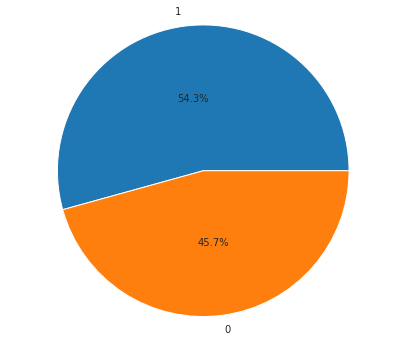

In [14]:
x = df['target'].value_counts().values
plt.figure(figsize=(7, 6))
plt.pie(x, center=(0, 0), radius=1.5, labels=df['target'].unique(), 
        autopct='%1.1f%%', pctdistance=0.5)
plt.axis('equal')
plt.show()

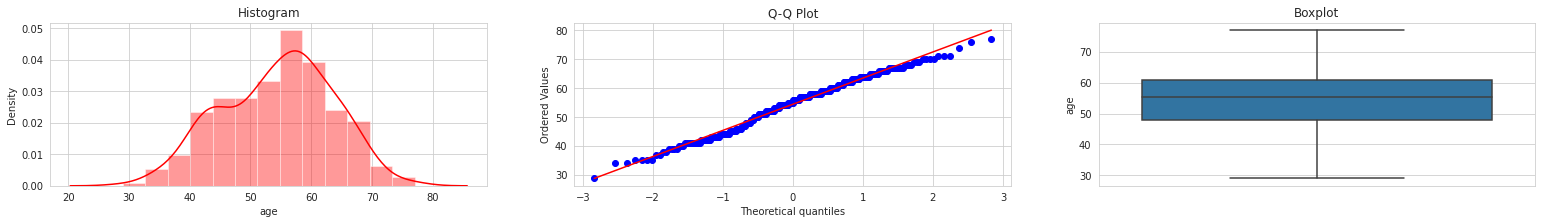

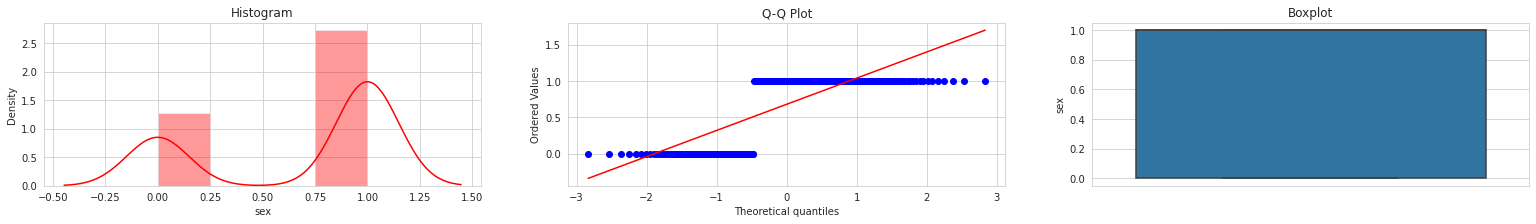

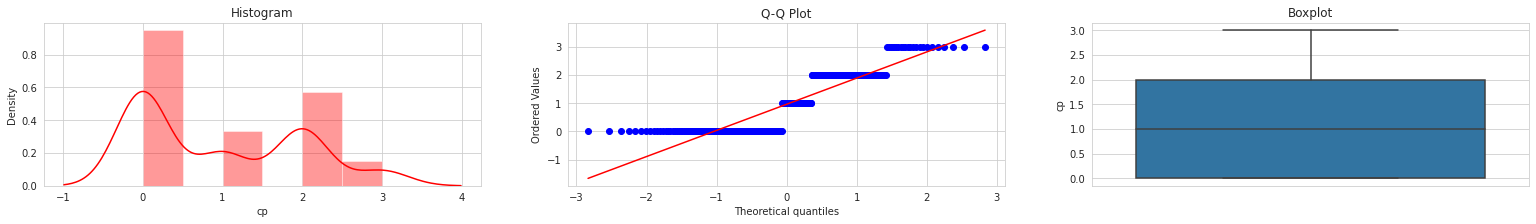

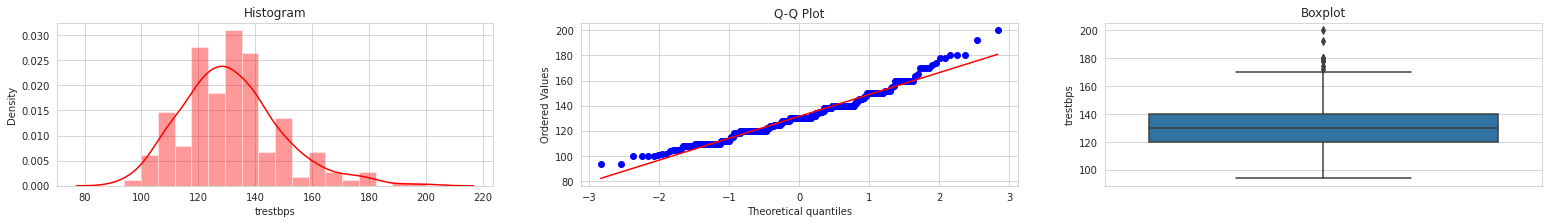

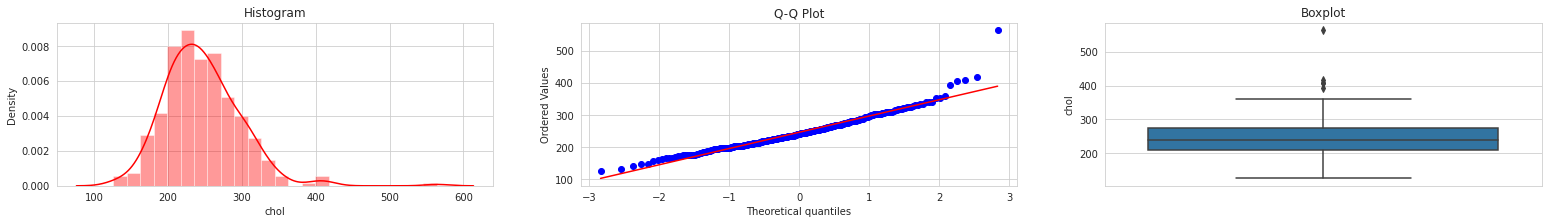

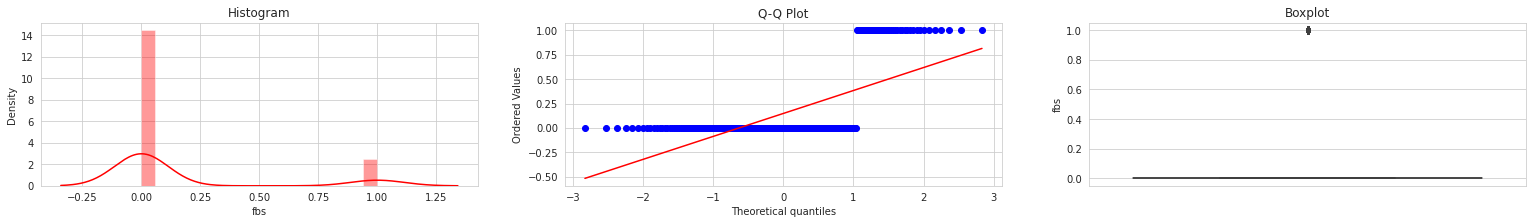

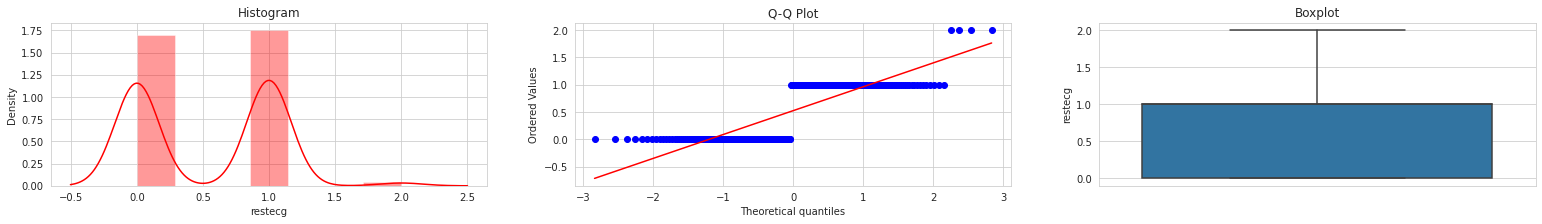

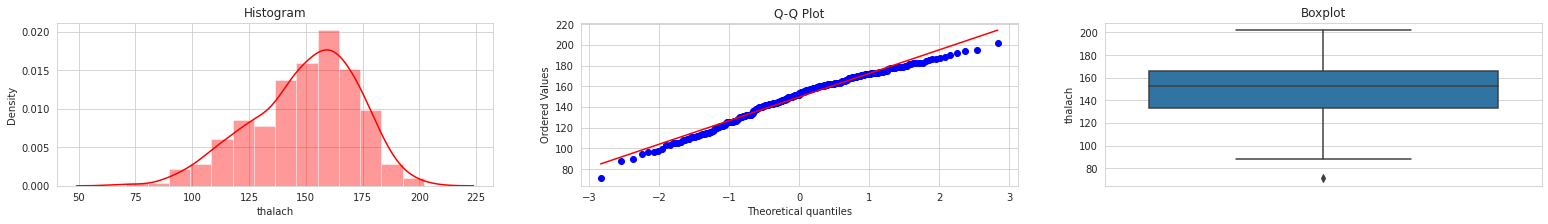

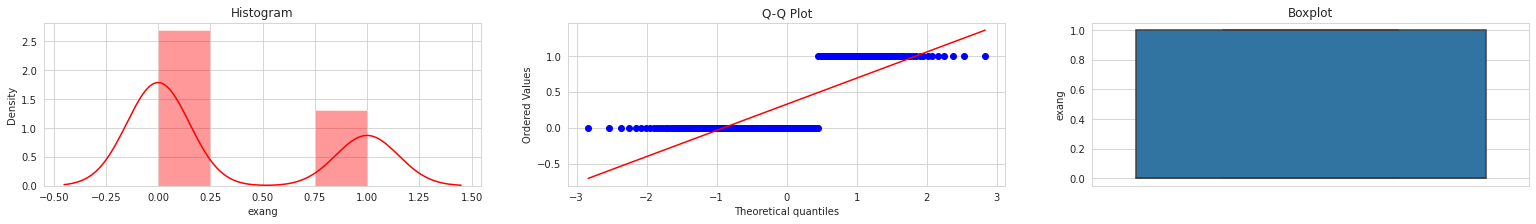

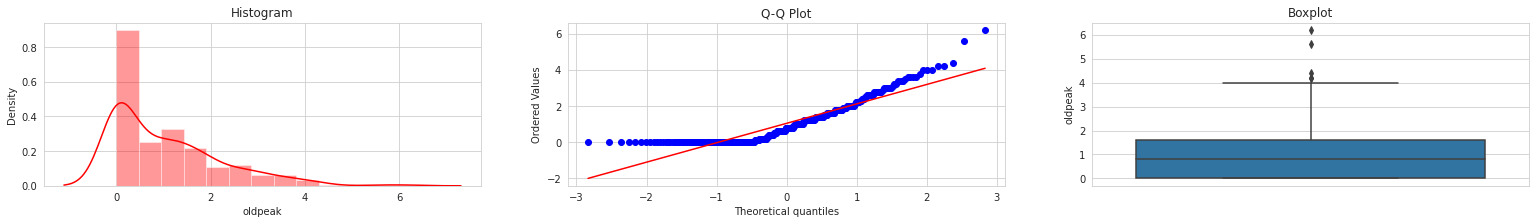

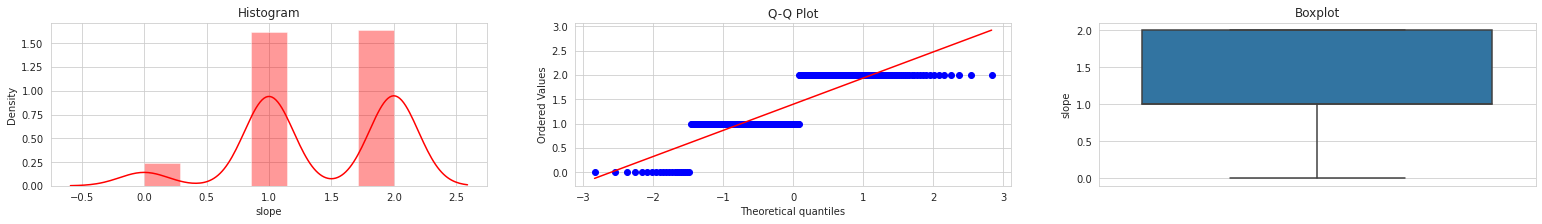

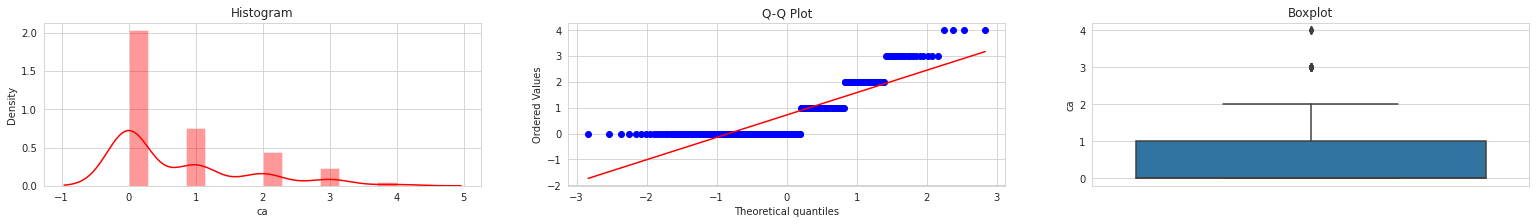

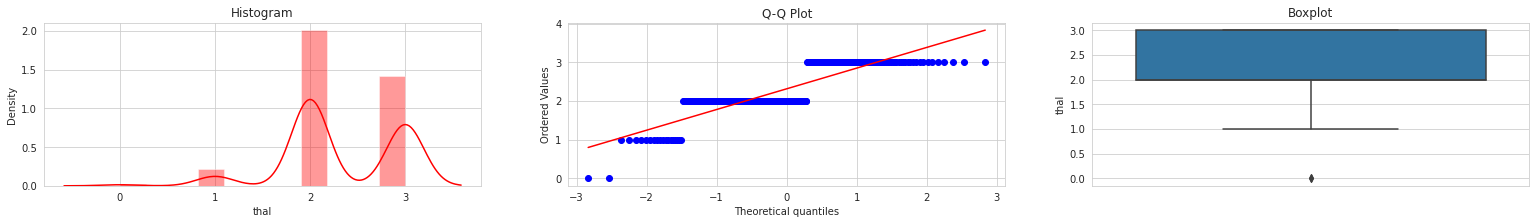

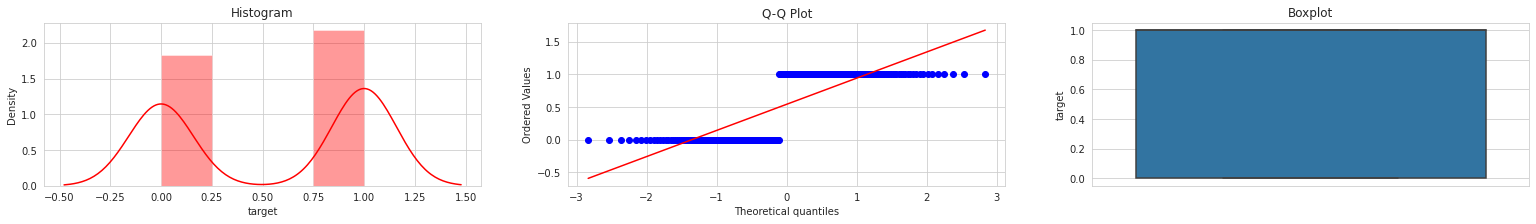

In [15]:
def dist_plot(data, col):
    fig = plt.figure(figsize=(15, 3))
    fig.subplots_adjust(right=1.5)
    
    plt.subplot(1, 3, 1)
    sns.distplot(data[col], kde=True, color='red')
    plt.title('Histogram')
    
    plt.subplot(1, 3, 2)
    stats.probplot(data[col], dist='norm', fit=True, plot=plt)
    plt.title('Q-Q Plot')

    plt.subplot(1, 3, 3)
    sns.boxplot(y=data[col])
    plt.title('Boxplot')
    
    plt.show()

for col in df.columns:
    dist_plot(df, col)

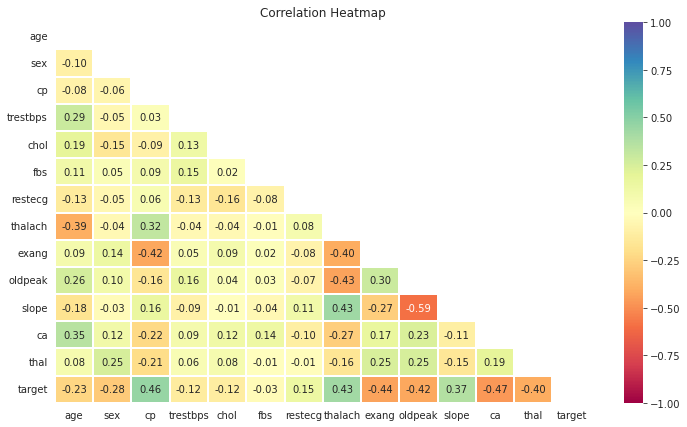

In [16]:
plt.figure(figsize = (12, 7))
corr = df.corr(method='spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))
cormat = sns.heatmap(corr, mask=mask, annot=True, 
                     cmap='Spectral', linewidths=1, 
                     vmin=-1, vmax=1, fmt=".2f")
cormat.set_title('Correlation Heatmap')
plt.show()

In [17]:
def dist_check(df, col_name):
  print("Unique values : ", df[col_name].unique())
  print("Value counts : ")
  print(df[col_name].value_counts())

col_lst = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

for col in col_lst: 
  print(col, " -")
  dist_check(df, col)
  print("\n")

sex  -
Unique values :  [1 0]
Value counts : 
1    206
0     96
Name: sex, dtype: int64


cp  -
Unique values :  [3 2 1 0]
Value counts : 
0    143
2     86
1     50
3     23
Name: cp, dtype: int64


fbs  -
Unique values :  [1 0]
Value counts : 
0    257
1     45
Name: fbs, dtype: int64


restecg  -
Unique values :  [0 1 2]
Value counts : 
1    151
0    147
2      4
Name: restecg, dtype: int64


exang  -
Unique values :  [0 1]
Value counts : 
0    203
1     99
Name: exang, dtype: int64


slope  -
Unique values :  [0 2 1]
Value counts : 
2    141
1    140
0     21
Name: slope, dtype: int64


ca  -
Unique values :  [0 2 1 3 4]
Value counts : 
0    175
1     65
2     38
3     20
4      4
Name: ca, dtype: int64


thal  -
Unique values :  [1 2 3 0]
Value counts : 
2    165
3    117
1     18
0      2
Name: thal, dtype: int64




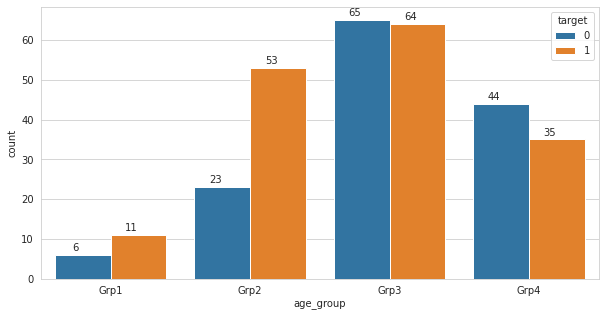

In [23]:
df['age_group'] = pd.cut(x=df['age'], 
                         bins=[df.age.min(), 40, 50, 60, df.age.max()], 
                         labels=['Grp1', 'Grp2', 'Grp3', 'Grp4'])

plt.figure(figsize=(10, 5))
ax1 = sns.countplot(x='age_group', hue='target', data=df)

for p in ax1.patches:
  ax1.annotate('{}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1), ha='center')

plt.show()

<Figure size 1440x1440 with 0 Axes>

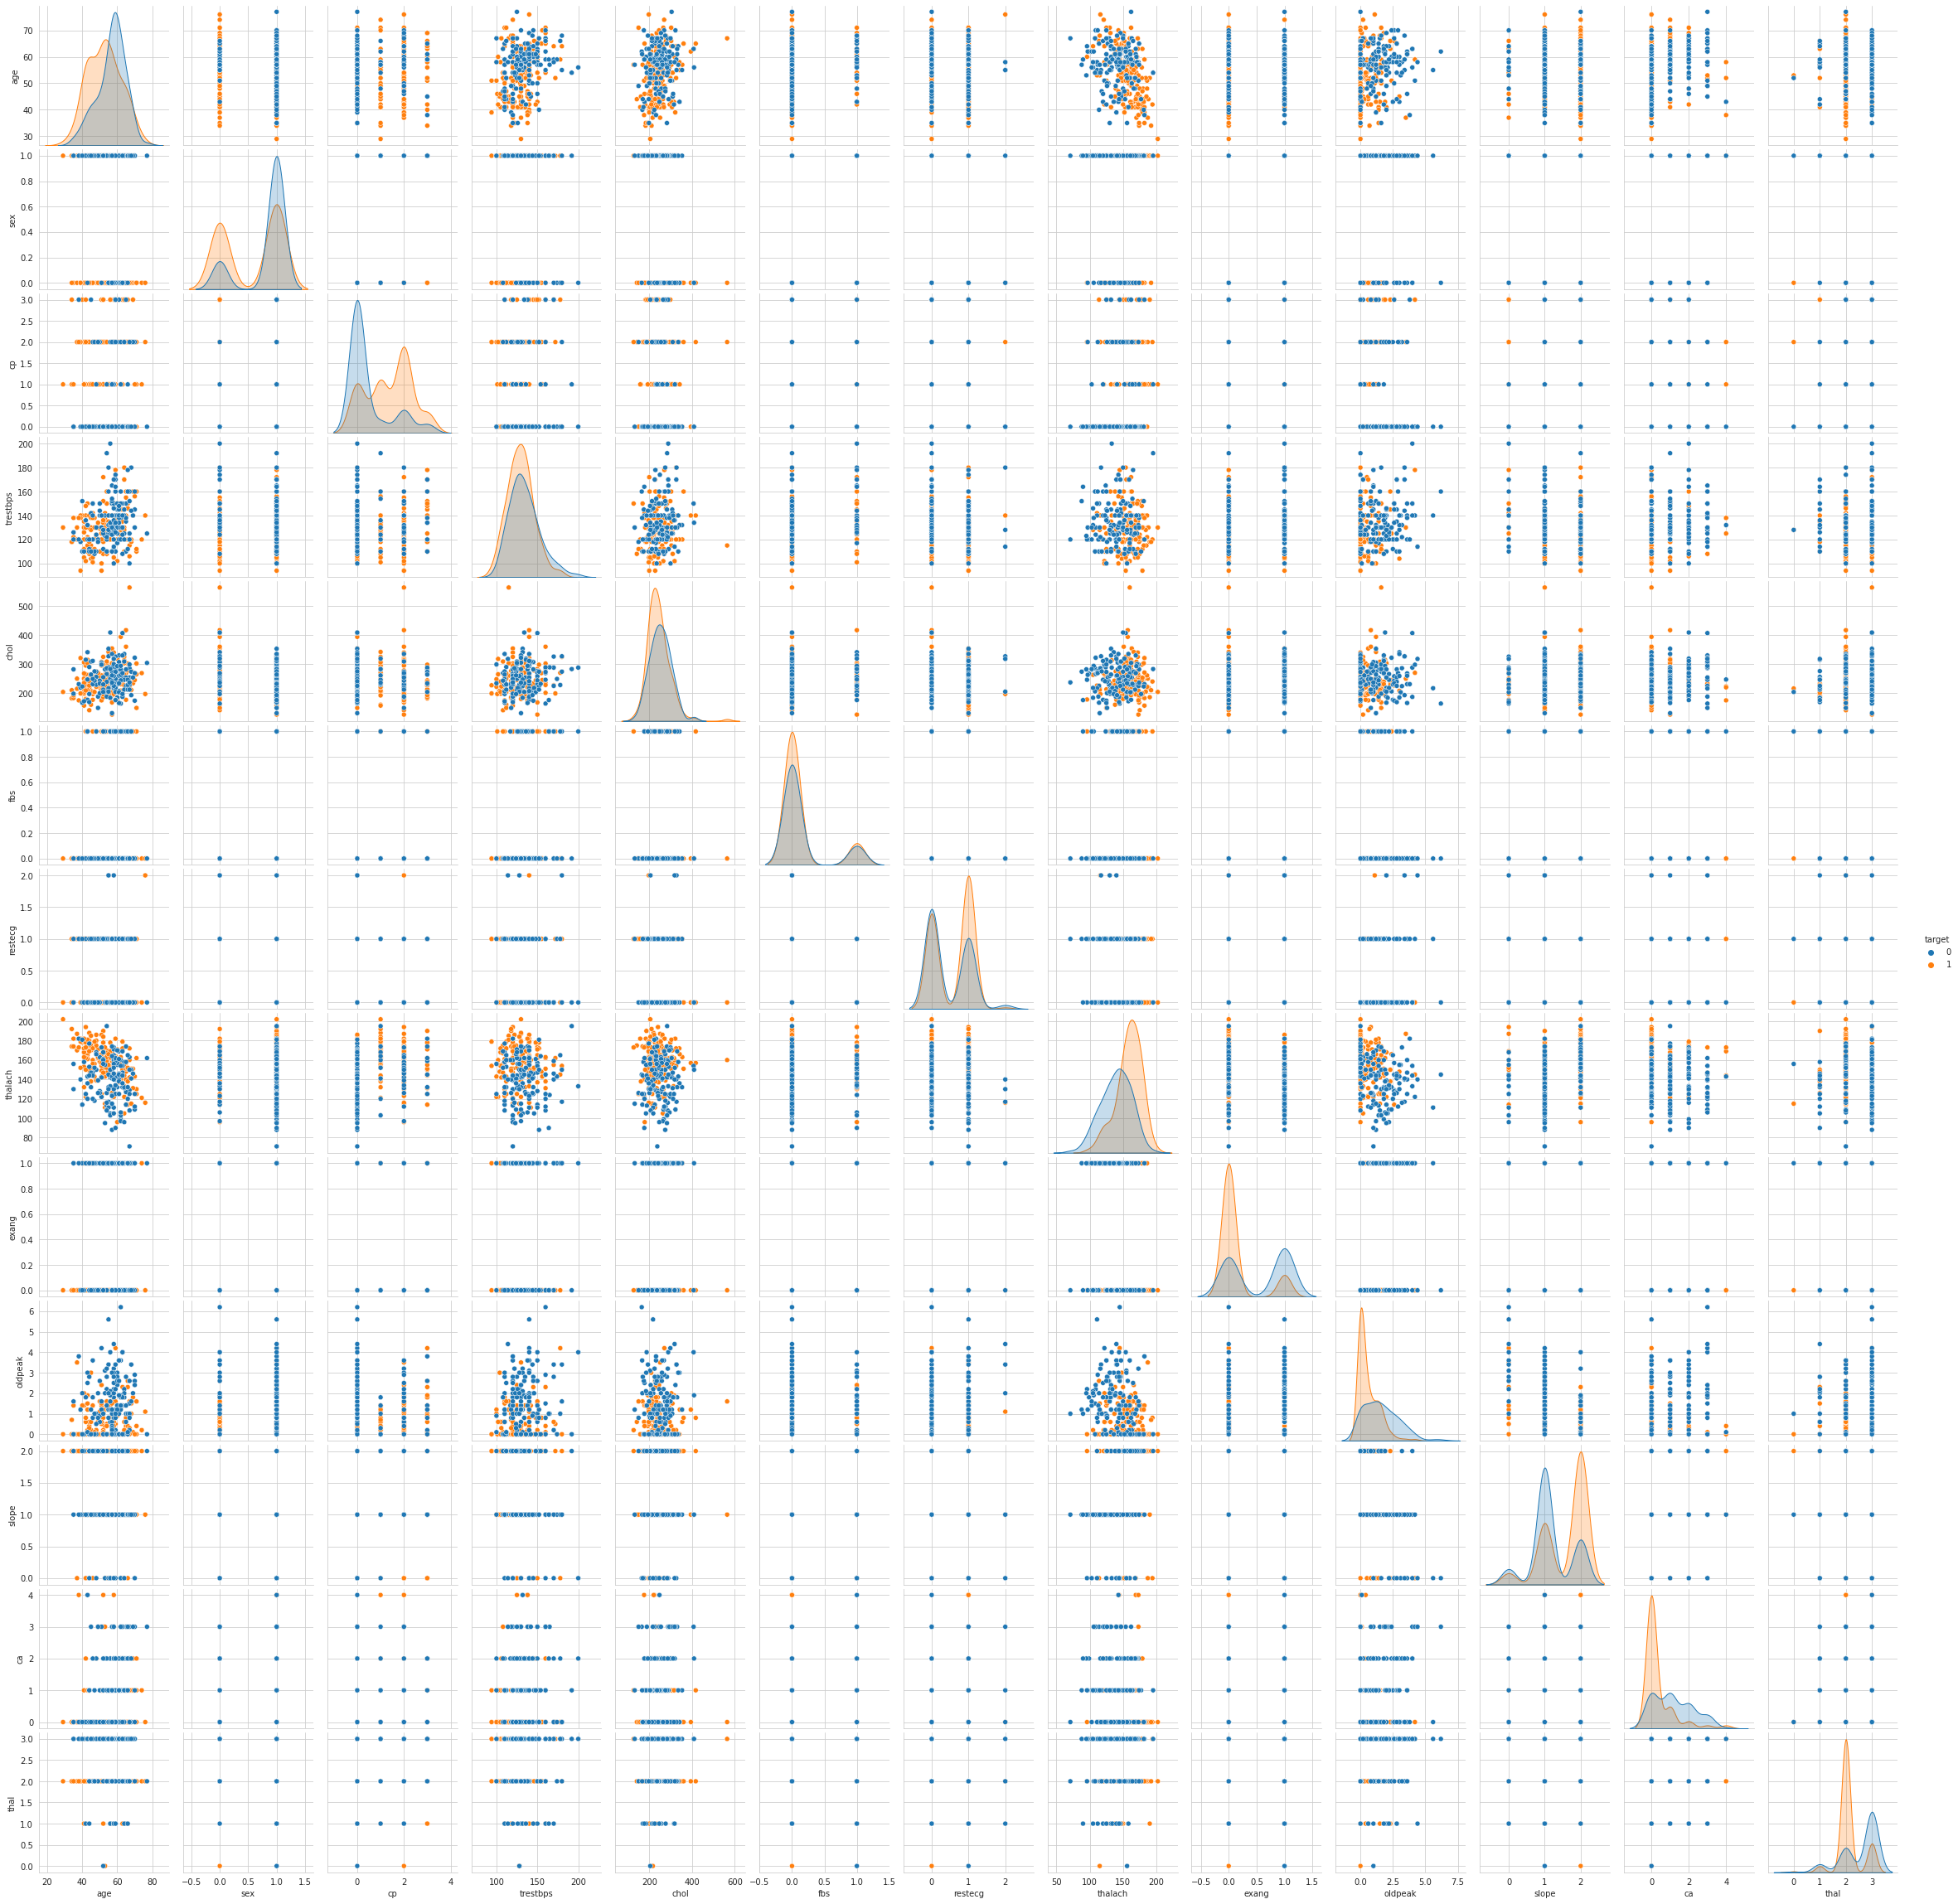

In [19]:
plt.figure(figsize=(20, 20))
sns.pairplot(df, hue='target')
plt.show()